predict emotion scores for all lines in the data
for every season, plot distribution of all emotion labels in that season
for each emotion label, plot relative freq of each emotion across all seasons

In [1]:
import os
import pandas as pd
from transformers import pipeline
import matplotlib.pyplot as plt

In [2]:
# load classifier pipeline from HuggingFace
classifier = pipeline("text-classification", 
                      model="j-hartmann/emotion-english-distilroberta-base", 
                      return_all_scores=False) # return only the most likely score

/home/ucloud/.local/lib/python3.10/site-packages/transformers/pipelines/text_classification.py:104: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


In [3]:
# navigating into the input folder and reading the dataset as a pandas dataframe
filename = os.path.join("../input/Game_of_Thrones_Script.csv")
data = pd.read_csv(filename)

In [4]:
print(data)

      Release Date    Season    Episode     Episode Title              Name  \
0       2011-04-17  Season 1  Episode 1  Winter is Coming      waymar royce   
1       2011-04-17  Season 1  Episode 1  Winter is Coming              will   
2       2011-04-17  Season 1  Episode 1  Winter is Coming      waymar royce   
3       2011-04-17  Season 1  Episode 1  Winter is Coming              will   
4       2011-04-17  Season 1  Episode 1  Winter is Coming             gared   
...            ...       ...        ...               ...               ...   
23906   2019-05-19  Season 8  Episode 6   The Iron Throne           brienne   
23907   2019-05-19  Season 8  Episode 6   The Iron Throne             bronn   
23908   2019-05-19  Season 8  Episode 6   The Iron Throne  tyrion lannister   
23909   2019-05-19  Season 8  Episode 6   The Iron Throne               man   
23910   2019-05-19  Season 8  Episode 6   The Iron Throne               all   

                                                Sen

In [9]:
print(data["Sentence"][0])

0        What do you expect? They're savages. One lot s...
1        I've never seen wildlings do a thing like this...
2                                   How close did you get?
3                                  Close as any man would.
4                         We should head back to the wall.
                               ...                        
23906    I think we can all agree that ships take prece...
23907        I think that's a very presumptuous statement.
23908    I once brought a jackass and a honeycomb into ...
23909                              The Queen in the North!
23910    The Queen in the North! The Queen in the North...
Name: Sentence, Length: 23911, dtype: object


In [61]:
classifier(data["Sentence"][0])

[{'label': 'disgust', 'score': 0.8400837182998657}]

In [63]:
scores = []
for row in datastr:
    result = classifier(row)
    scores.append(result)

KeyboardInterrupt: 

In [15]:
len(scores)

693

In [2]:
#print(scores[0])
print(scores[0]["label"])

NameError: name 'scores' is not defined

In [62]:
dftest = data
# Using DataFrame.insert() to add a column
df.insert(2, "Emotion label", scores, True)

      Release Date    Season    Episode     Episode Title              Name  \
0       2011-04-17  Season 1  Episode 1  Winter is Coming      waymar royce   
1       2011-04-17  Season 1  Episode 1  Winter is Coming              will   
2       2011-04-17  Season 1  Episode 1  Winter is Coming      waymar royce   
3       2011-04-17  Season 1  Episode 1  Winter is Coming              will   
4       2011-04-17  Season 1  Episode 1  Winter is Coming             gared   
...            ...       ...        ...               ...               ...   
23906   2019-05-19  Season 8  Episode 6   The Iron Throne           brienne   
23907   2019-05-19  Season 8  Episode 6   The Iron Throne             bronn   
23908   2019-05-19  Season 8  Episode 6   The Iron Throne  tyrion lannister   
23909   2019-05-19  Season 8  Episode 6   The Iron Throne               man   
23910   2019-05-19  Season 8  Episode 6   The Iron Throne               all   

                                                Sen

In [73]:
data.Season.value_counts()

Season
Season 2    3914
Season 3    3573
Season 4    3446
Season 1    3179
Season 5    3035
Season 6    2856
Season 7    2442
Season 8    1466
Name: count, dtype: int64

In [4]:
s1 = data[data['Season'] == 'Season 1']

In [5]:
s1

,Release Date,Season,Episode,Episode Title,Name,Sentence
0,2011-04-17,Season 1,Episode 1,Winter is Coming,waymar royce,What do you expect? They're savages. One lot s...
1,2011-04-17,Season 1,Episode 1,Winter is Coming,will,I've never seen wildlings do a thing like this...
2,2011-04-17,Season 1,Episode 1,Winter is Coming,waymar royce,How close did you get?
3,2011-04-17,Season 1,Episode 1,Winter is Coming,will,Close as any man would.
4,2011-04-17,Season 1,Episode 1,Winter is Coming,gared,We should head back to the wall.
...,...,...,...,...,...,...
3174,2011-06-19,Season 1,Episode 10,Fire and Blood,daenerys targaryen,ls that what you fear? You will be my khalasar...
3175,2011-06-19,Season 1,Episode 10,Fire and Blood,daenerys targaryen,"Ser Jorah, bind this woman to the pyre. You sw..."
3176,2011-06-19,Season 1,Episode 10,Fire and Blood,mirri maz duur,You will not hear me scream.
3177,2011-06-19,Season 1,Episode 10,Fire and Blood,daenerys targaryen,I will. But it is not your screams I want. Onl...


below here can be used generally for the whole dataset! remove slic and s1 -> data
maybe do these steps once per season?

In [8]:
s1scores = []
for row in s1["Sentence"]:
    result = classifier(row)
    s1scores.append(result)

In [9]:
len(s1scores)

3179

In [10]:
print(s1scores)

[[{'label': 'disgust', 'score': 0.8400837182998657}], [{'label': 'disgust', 'score': 0.6117002367973328}], [{'label': 'surprise', 'score': 0.7143816947937012}], [{'label': 'neutral', 'score': 0.9114254713058472}], [{'label': 'fear', 'score': 0.42081132531166077}], [{'label': 'fear', 'score': 0.9559083580970764}], [{'label': 'neutral', 'score': 0.6202900409698486}], [{'label': 'surprise', 'score': 0.7657095193862915}], [{'label': 'anger', 'score': 0.5590818524360657}], [{'label': 'anger', 'score': 0.6356110572814941}], [{'label': 'neutral', 'score': 0.5159046053886414}], [{'label': 'neutral', 'score': 0.8349234461784363}], [{'label': 'neutral', 'score': 0.9458221197128296}], [{'label': 'surprise', 'score': 0.5850772857666016}], [{'label': 'neutral', 'score': 0.8170824646949768}], [{'label': 'neutral', 'score': 0.3842598497867584}], [{'label': 'anger', 'score': 0.4297430217266083}], [{'label': 'neutral', 'score': 0.6922541260719299}], [{'label': 'neutral', 'score': 0.6663596034049988}], 

In [11]:
counter = 0
s1emotions = []

for emotion in s1scores:
    s1emotion = s1scores[counter][0]["label"]
    s1emotions.append(s1emotion)
    counter += 1
print(s1emotions)

['disgust', 'disgust', 'surprise', 'neutral', 'fear', 'fear', 'neutral', 'surprise', 'anger', 'anger', 'neutral', 'neutral', 'neutral', 'surprise', 'neutral', 'neutral', 'anger', 'neutral', 'neutral', 'joy', 'neutral', 'neutral', 'neutral', 'surprise', 'disgust', 'neutral', 'surprise', 'disgust', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'sadness', 'neutral', 'anger', 'neutral', 'fear', 'neutral', 'neutral', 'sadness', 'neutral', 'surprise', 'disgust', 'anger', 'neutral', 'anger', 'surprise', 'neutral', 'surprise', 'anger', 'surprise', 'neutral', 'neutral', 'disgust', 'disgust', 'disgust', 'neutral', 'neutral', 'anger', 'sadness', 'neutral', 'neutral', 'neutral', 'anger', 'anger', 'anger', 'anger', 'sadness', 'neutral', 'anger', 'surprise', 'anger', 'surprise', 'neutral', 'fear', 'fear', 'fear', 'anger', 'neutral', 'sadness', 'anger', 'disgust', 'neutral', 'neutral', 'neutral', 'surprise', 'neutral', 'sadness', 'neutral', 'sadness', 'neutral', 'neutral', 'neutra

In [12]:
# create a counter for each emotion label
anger_count = 0
disgust_count = 0
fear_count = 0
joy_count = 0
neutral_count = 0
sadness_count = 0
surprise_count = 0

for emotion in s1emotions: #add 1 to the counter which corresponds to the emotion
    if emotion == "anger":
        anger_count += 1
    elif emotion == "disgust":
        disgust_count += 1
    elif emotion == "fear":
        fear_count += 1
    elif emotion == "joy":
        joy_count += 1
    elif emotion == "neutral":
        neutral_count += 1
    elif emotion == "sadness":
        sadness_count += 1
    elif emotion == "surprise":
        surprise_count += 1

In [14]:
dftest = data[0:3179]
# Using DataFrame.insert() to add a column
dftest.insert(6, "Emotion_label", s1emotions, True)

In [15]:
dftest

,Release Date,Season,Episode,Episode Title,Name,Sentence,Emotion_label
0,2011-04-17,Season 1,Episode 1,Winter is Coming,waymar royce,What do you expect? They're savages. One lot s...,disgust
1,2011-04-17,Season 1,Episode 1,Winter is Coming,will,I've never seen wildlings do a thing like this...,disgust
2,2011-04-17,Season 1,Episode 1,Winter is Coming,waymar royce,How close did you get?,surprise
3,2011-04-17,Season 1,Episode 1,Winter is Coming,will,Close as any man would.,neutral
4,2011-04-17,Season 1,Episode 1,Winter is Coming,gared,We should head back to the wall.,fear
...,...,...,...,...,...,...,...
3174,2011-06-19,Season 1,Episode 10,Fire and Blood,daenerys targaryen,ls that what you fear? You will be my khalasar...,fear
3175,2011-06-19,Season 1,Episode 10,Fire and Blood,daenerys targaryen,"Ser Jorah, bind this woman to the pyre. You sw...",anger
3176,2011-06-19,Season 1,Episode 10,Fire and Blood,mirri maz duur,You will not hear me scream.,fear
3177,2011-06-19,Season 1,Episode 10,Fire and Blood,daenerys targaryen,I will. But it is not your screams I want. Onl...,anger


In [16]:
emotion_freq = []
emotion_freq.append(anger_count)
emotion_freq.append(disgust_count)
emotion_freq.append(fear_count)
emotion_freq.append(joy_count)
emotion_freq.append(neutral_count)
emotion_freq.append(sadness_count)
emotion_freq.append(surprise_count)
print(emotion_freq)

[534, 360, 136, 133, 1422, 204, 390]


In [17]:
emotions = ["anger", "disgust", "fear", "joy", "neutral", "sadness", "surprise"]

Text(0, 0.5, 'Frequencies')

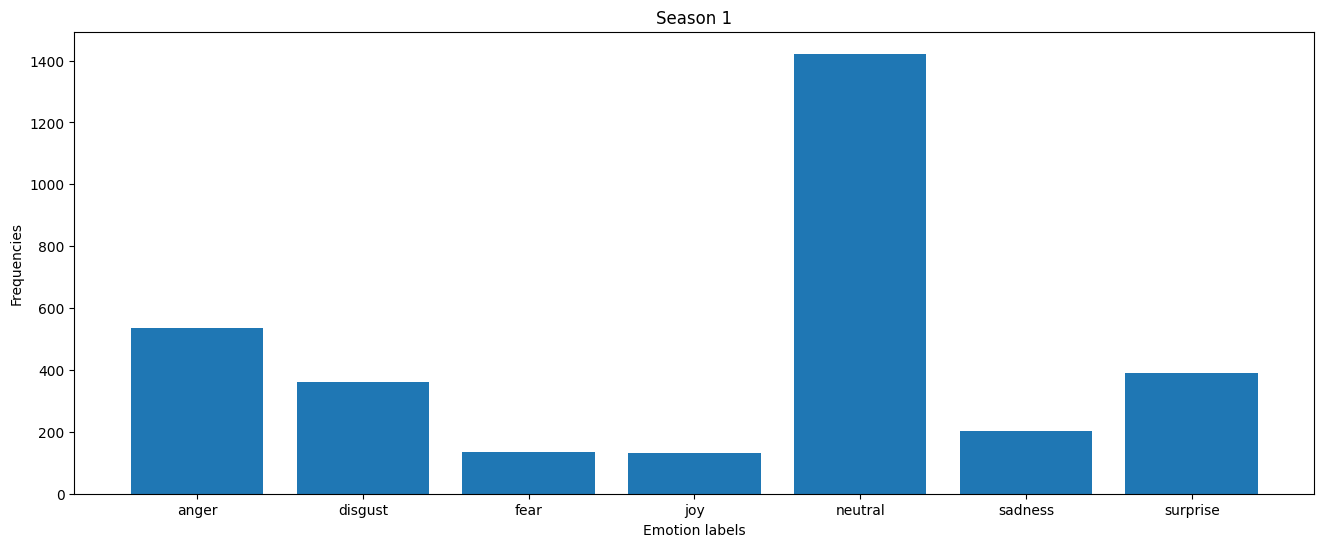

In [18]:
plt.figure(figsize = (16,6))
plt.bar(emotions, emotion_freq)
plt.title('Season 1')
plt.xlabel('Emotion labels')
plt.ylabel('Frequencies')